In [1]:
import kachery_p2p as kp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from utils import parse_sf_results
from plotting import plot_performance_matrix

In [2]:
# Load in the data from the sf url
khash = 'sha1://b3444629251cafda919af535f0e9837279151c6e/spikeforest-full-gt-qm.json?manifest=cf73c99d06c11e328e635e14dc24b8db7372db3d'
sf_data = kp.load_json(khash)

In [3]:
paired_study_names = list(set([entry['studyName'] for entry in sf_data if 'paired' in entry['studyName']]))

In [4]:
all_data = parse_sf_results(sf_data=sf_data, by_sorter=True, exclude_study_names=paired_study_names, train_test_split=True)

In [5]:
model = RandomForestClassifier(n_estimators=100)

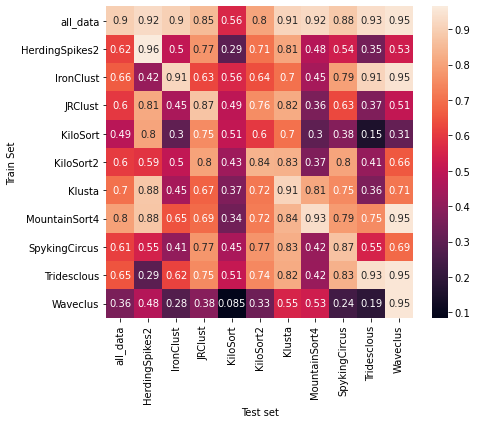

In [6]:
plot_performance_matrix(all_data, model, metric=f1_score, save_path='figures/f1_scores_over_sorters.pdf')